# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training & Testing Sets

##### Step 1: Read the `lending_data.csv` data into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_path = Path('./Resources/lending_data.csv')
lending_data_df = pd.read_csv(lending_data_path)

# Review the DataFrame
print("\nThe following are the first 5 rows  of the lending_data_df:")
display(lending_data_df.head())
print("The following are the last 5 rows  of the lending_data_df:")
display(lending_data_df.tail())
print("Here is some informtion about the dataframe:")
display(lending_data_df.info())


The following are the first 5 rows  of the lending_data_df:


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


The following are the last 5 rows  of the lending_data_df:


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


Here is some informtion about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


None

#### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# TASK: Separate the data into labels and features
# NOTE:  In Simplest Terms we need to make two dataframes from our existing lending_data_df
#-------- 1. A copy of the orig dataframe minus the loan status columns (X)
#-------- 2. A df that has only on column the loan status values (y)
# I like to think of it as the outcomes (y)  versus the factors used to determine the outcomes (X)

# Separate the y variable, the labels
y = lending_data_df['loan_status']

# Separate the X variable, the features
#. 1. Make a copy
#. 2 Drop the loan status

X = lending_data_df.copy()
X = X.drop("loan_status",1) 

In [4]:
# Its Important to check:
print("\nThis are the first 5 records in the y series:")
display(y.head())
print("\nThis are the first 5 records in the X dataframe:")
display(X.head())


This are the first 5 records in the y series:


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64


This are the first 5 records in the X dataframe:


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [5]:
# Check the balance of our target values

print(f"There are a total of a {len(lending_data_df)} in this data-set")
val_list = y.value_counts()
display(y.value_counts())

There are a total of a 77536 in this data-set


0    75036
1     2500
Name: loan_status, dtype: int64

In [6]:
display(f"There is an extreme oversampling of the 0 values in this data set by a factor of {round((val_list[0]/val_list[1]),2)} times")

'There is an extreme oversampling of the 0 values in this data set by a factor of 30.01 times'

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=1, 
    stratify=y
)

#display(X_train.head())
#display(X_test.head())

display(X_train.shape)
display(X_test.shape)

(58152, 7)

(19384, 7)

---

## Create a Logistic Regression Model with the Original Data

##### Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)
#display(y_pred)

# Note: I think its important to be able to see the dataframe just to help things sink in
print("Here is a dataframe with prediction results, just to visualize")
prediction_results = pd.DataFrame(
    {"Prediction":y_pred,
     "Actual":y_test}
)
print("\nThis are the first 5 records in the prediction_results_df")
display(prediction_results.head())
print("\nThis are the last 5 records in the prediction_results_df")
display(prediction_results.tail())

Here is a dataframe with prediction results, just to visualize

This are the first 5 records in the prediction_results_df


,Prediction,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0



This are the last 5 records in the prediction_results_df


,Prediction,Actual
38069,0,0
36892,0,0
5035,0,0
40821,0,0
35030,0,0


### Graphing y and y_Test 

#### Note: I thought it be nice to see the graphical difference between `y` and `y_test`

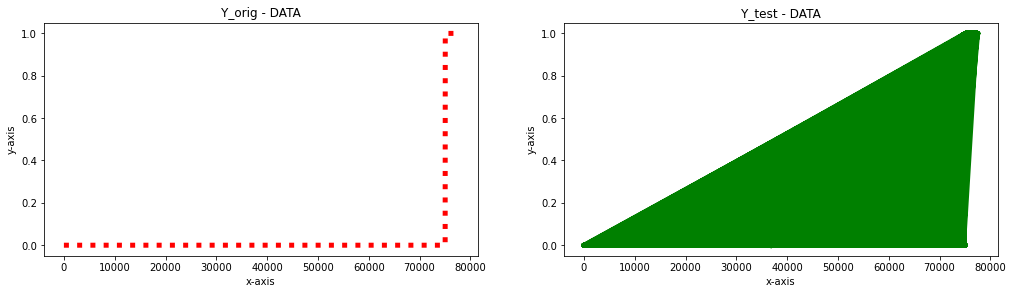

In [11]:
plt.subplots(figsize=(15, 5))
 
# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
plt.plot(y.index, y, 'r', linewidth=5, linestyle=':')
plt.title('Y_orig - DATA')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
 
# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, 'g', linewidth=5)
plt.title('Y_test - DATA')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
 
# space between the plots
plt.tight_layout(4)
 
# show plot
plt.show()

### Step 3: Evaluate the model’s performance by doing the following:
* Calculate the accuracy score of the model.
* Generate a confusion matrix.
* Print the classification report.

In [42]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, y_pred)


0.9442676901753825

In [13]:
# Generate a confusion matrix for the model
# Note: I wanted to print out the confusion matrix in a way that added value i.e. its easy to interpret the numbers
from IPython.display import display, HTML

confusion_mtrx = confusion_matrix(y_test, y_pred)
confusion_mtrx_df = pd.DataFrame(confusion_mtrx,columns=['Predicted_True','Predicted_False'])
label = ['Actually_True','Actually_False']
confusion_mtrx_df['Index'] = label

confusion_mtrx_df = confusion_mtrx_df.set_index(['Index'])
display(HTML(confusion_mtrx_df.to_html()))


,Predicted_True,Predicted_False
Index,,
Actually_True,18679,80
Actually_False,67,558


In [35]:
# Print the classification report for the model
class_report = classification_report_imbalanced(y_test, y_pred)
print(class_report)


                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.89      1.00      0.94      0.90     18759
          1       0.87      0.89      1.00      0.88      0.94      0.88       625

avg / total       0.99      0.99      0.90      0.99      0.94      0.90     19384

<class 'str'>


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Just from the over representation of healthy loans in the  data set I would expect the logical regression model to be better at picking them over the unhealthy. Looking as the classication report, the precision for the 0 values is 1.00. This means that out of all the times that the model predicted a testing data observation to be the value 0 (healthy loans), 100% of those predictions were correct. On the other hand, out of all the times that the model predicted a value of 1, only 87% of those predictions were correct.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [46]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

In [47]:
# Count the distinct values of the resampled labels data
display(y_resampled.value_counts())
display(X_resampled.value_counts())

display(y_resampled.head())

0    56277
1    56277
Name: loan_status, dtype: int64

loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  derogatory_marks  total_debt
19900.0    11.596         89700            0.665552        13               2                 59700         185
19100.0    11.246         86400            0.652778        12               2                 56400         163
19300.0    11.316         87100            0.655568        12               2                 57100         162
18500.0    10.976         83900            0.642431        12               2                 53900         162
19300.0    11.310         87000            0.655172        12               2                 57000         156
                                                                                                           ... 
17800.0    10.696         81300            0.630996        11               2                 51300           1
12300.0    8.371          59400            0.494949        6                1                 29400           1

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [53]:
# Instantiate the Logistic Regression model
model_rsmpld = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using the resampled training data
model_rsmpld.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
y_pred_rsmpld = model_rsmpld.predict(X_test)

# Note: Like Before it's important to be able to see the dataframe just to help things sink in
print("Here is a dataframe with prediction results, just to visualize")
print("this has resampled data")

prediction_results_rsmpld = pd.DataFrame(
    {"Prediction":y_pred_rsmpld,
     "Actual":y_test}
)
print("\nThis are the first 5 records in the prediction_results_rsmpld")
display(prediction_results_rsmpld.head())
print("\nThis are the last 5 records in the prediction_results_rsmpld")
display(prediction_results_rsmpld.tail())

Here is a dataframe with prediction results, just to visualize
this has resampled data

This are the first 5 records in the prediction_results_rsmpld


,Prediction,Actual
36831,0,0
75818,1,1
36563,0,0
13237,0,0
43292,0,0



This are the last 5 records in the prediction_results_rsmpld


,Prediction,Actual
38069,0,0
36892,0,0
5035,0,0
40821,0,0
35030,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.
* Generate a confusion matrix.
* Print the classification report.

In [54]:
# Print the balanced_accuracy score of the model 
acc_score = balanced_accuracy_score(y_test, y_pred_rsmpld)
print(acc_score)

0.9959744975744975


In [55]:
# Generate a confusion matrix for the model
# Note: I wanted to print out the confusion matrix in a way that added value i.e. its easy to interpret the numbers
from IPython.display import display, HTML

confusion_mtrx2 = confusion_matrix(y_test, y_pred_rsmpld)
confusion_mtrx2_df = pd.DataFrame(confusion_mtrx2,columns=['Predicted_True','Predicted_False'])
label = ['Actually_True','Actually_False']
confusion_mtrx2_df['Index'] = label

confusion_mtrx2_df = confusion_mtrx2_df.set_index(['Index'])
display(HTML(confusion_mtrx2_df.to_html()))

,Predicted_True,Predicted_False
Index,,
Actually_True,18668,91
Actually_False,2,623


In [61]:
# Print the classification report for the model
class_report2 = classification_report_imbalanced(y_test, y_pred_rsmpld)
print("This is the classification report after resampling")
print(class_report2)
print("\n\n")
print("This is the first classification report, no resampliong")
print(class_report)

This is the classification report after resampling
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      0.99     18759
          1       0.87      1.00      1.00      0.93      1.00      0.99       625

avg / total       1.00      1.00      1.00      1.00      1.00      0.99     19384




This is the first classification report, no resampliong
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.89      1.00      0.94      0.90     18759
          1       0.87      0.89      1.00      0.88      0.94      0.88       625

avg / total       0.99      0.99      0.90      0.99      0.94      0.90     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** I had to print ou both class reports so I could see what changed. 
The balance accuracy score increased from 0.94 to 0.99. The balance accurancy score is the proportion of correctly identified negatives over the total negative prediction made by the model. The increase seems promising but its not until we check out the classification report that we will get a more nuanced understanding of whats happening.

The precision values stayed the same for healthy loans and for high risk loans. To recap that means that out of all the times that the model predicted a testing data observation to be the value 0 (healthy loans), 100% of those predictions were correct. On the other hand, out of all the times that the model predicted a value of 1, only 87% of those predictions were correct.

The next thing we need to look at is recall. Recall is a measure of the classifier's completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. The recall in this case increased from 0.89 to 1. What this increase in the recall means is that the model that used the oversampled data was more accurate at predicting unhealthy loans

